In [515]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import LSTM
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional     
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout 

In [516]:
df = pd.read_csv('../input/water-potability/water_potability.csv')
df.shape

(3276, 10)

In [517]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [518]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [519]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [520]:
df.fillna(df.mean(), inplace=True)
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [521]:
X = df.drop(["Potability"], axis=1)
y = df["Potability"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [522]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [523]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_train.shape

(2620, 9, 1)

In [524]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape


(656, 9, 1)

In [534]:
lstm_model = Sequential()
lstm_model.add(LSTM(16, input_shape=(9,1), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
#lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
#history = lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, shuffle=False)#, callbacks=[callbacks])
model.fit(x=X_train, 
          y=y_train, 
          epochs=100,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/100
82/82 [==============================] - 2s 22ms/step - loss: 0.5081 - accuracy: 0.7248 - val_loss: 0.6974 - val_accuracy: 0.6448
Epoch 2/100
82/82 [==============================] - 2s 21ms/step - loss: 0.5095 - accuracy: 0.7225 - val_loss: 0.7504 - val_accuracy: 0.6098
Epoch 3/100
82/82 [==============================] - 2s 22ms/step - loss: 0.5121 - accuracy: 0.7317 - val_loss: 0.7100 - val_accuracy: 0.6326
Epoch 4/100
82/82 [==============================] - 2s 21ms/step - loss: 0.5081 - accuracy: 0.7271 - val_loss: 0.7447 - val_accuracy: 0.6265
Epoch 5/100
82/82 [==============================] - 2s 22ms/step - loss: 0.5034 - accuracy: 0.7260 - val_loss: 0.7400 - val_accuracy: 0.6189
Epoch 6/100
82/82 [==============================] - 2s 23ms/step - loss: 0.5056 - accuracy: 0.7332 - val_loss: 0.7408 - val_accuracy: 0.6265
Epoch 7/100
82/82 [==============================] - 2s 23ms/step - loss: 0.5090 - accuracy: 0.7305 - val_loss: 0.7317 - val_accuracy: 0.6174
Epoch 

In [535]:
model_loss = pd.DataFrame(history.history)

<AxesSubplot:>

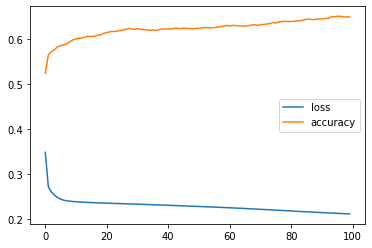

In [536]:
model_loss.plot()

In [537]:
y_pred = model.predict(X_test)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred ]

In [538]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.70      0.73      0.72       412
           1       0.51      0.47      0.49       244

    accuracy                           0.63       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.63      0.63      0.63       656



In [540]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[302 110]
 [130 114]]
Accuracy: 63.41463414634146%
